## Contents
    4.9 Excerise objectives

In [3]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# create path

path = r'/Users/jonathanfava/07-2022 Instacart Basket Analysis'

In [5]:
# import df 

ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_produts_grouped.pkl'))

<AxesSubplot:>

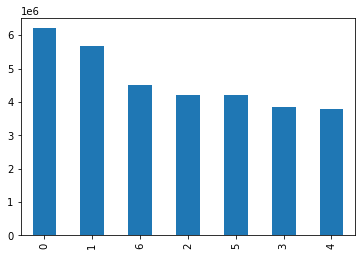

In [10]:
# create bar chart

ords_prods['order_day_of_week'].value_counts().plot.bar()

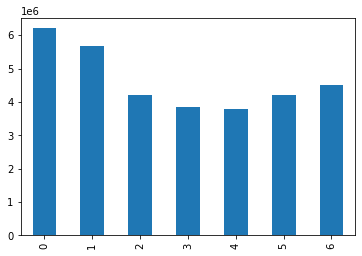

In [11]:
# sort days of the week

bar = ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar()

In [13]:
ords_prods['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

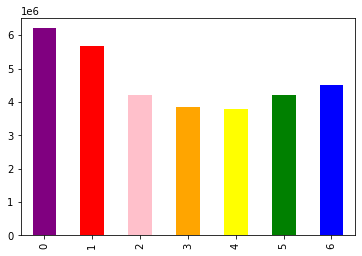

In [16]:
# add colors to bar chart

ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [17]:
# export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

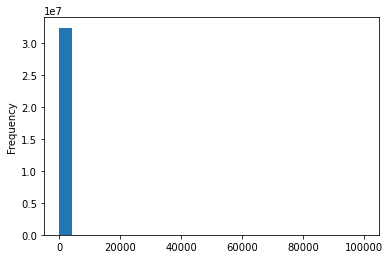

In [18]:
# create histogram for prices

ords_prods['prices'].plot.hist(bins = 25)

In [19]:
ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

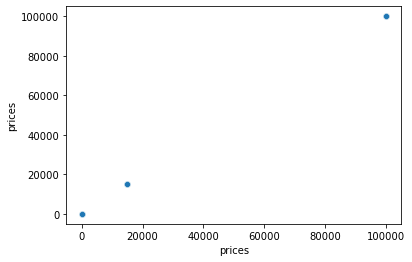

In [21]:
# create scatterplot for prices

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods)

In [22]:
ords_prods.loc[ords_prods['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_ord_freq,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High range product,Regularly Busy,Regularly Busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High range product,Regularly Busy,Slowest days,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High range product,Regularly Busy,Regularly Busy,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High range product,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High range product,Regularly Busy,Busiest days,Average Orders,16,Regular customer,114.426619,High spender,23.0,Loyal customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High range product,Regularly Busy,Slowest days,Most Orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High range product,Regularly Busy,Slowest days,Average Orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [23]:
ords_prods.loc[ords_prods['prices'] > 100, 'prices'] = np.nan

In [24]:
ords_prods['prices'].max()

25.0

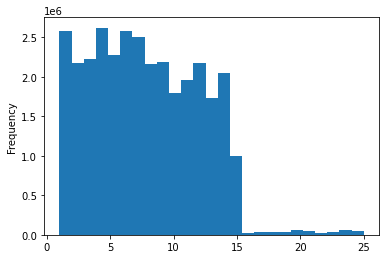

In [25]:
hist = ords_prods['prices'].plot.hist(bins = 25)

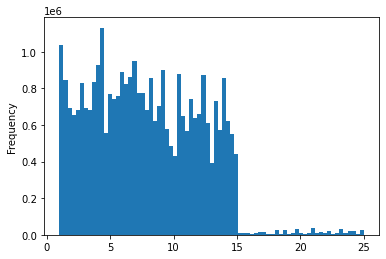

In [26]:
hist_2 = ords_prods['prices'].plot.hist(bins = 75)

In [27]:
# export prices hist

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [31]:
# create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [33]:
# store 70% of the sample in the daf big

big = ords_prods[dev]

In [34]:
# store 30% of the sample in the df small

small = ords_prods[~dev]

In [35]:
# check df size

len(ords_prods)

32404859

In [36]:
# check size of new dfs big and small

len(big) + len(small)

32404859

In [37]:
df_2 = small[['order_day_of_week','prices']]

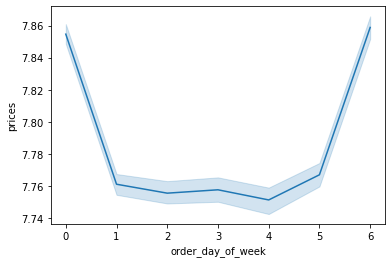

In [38]:
# create line chart

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [39]:
# export as pickle

ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_produts_4.9t.pkl'))